# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [63]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [64]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

City processed: saldanha
City processed: barrow
City processed: aranda de duero
City processed: requena
City processed: ancud
City processed: east london
City processed: comodoro rivadavia
City NOT found: illoqqortoormiut
City processed: nanortalik
City processed: erenhot
City processed: chuy
City processed: sangre grande
City processed: ribeira grande
City processed: varhaug
City processed: busselton
City processed: qaanaaq
City processed: cidreira
City processed: pacific grove
City processed: cape town
City processed: vaini
City processed: albany
City processed: atuona
City processed: talnakh
City processed: uivar
City NOT found: nizhneyansk
City NOT found: taolanaro
City processed: katangli
City processed: georgetown
City processed: rikitea
City NOT found: scottsburgh
City processed: garowe
City NOT found: tsihombe
City processed: meulaboh
City processed: victoria
City processed: longyearbyen
City processed: mahibadhoo
City processed: tuktoyaktuk
City NOT found: galiwinku
City proce

City processed: bitadton
City processed: porto santo
City processed: chapais
City NOT found: palabuhanratu
City processed: alofi
City processed: raga
City processed: dikson
City processed: lagoa
City processed: riyadh
City processed: ulaanbaatar
City processed: lappeenranta
City processed: yen bai
City processed: taoudenni
City NOT found: babanusah
City processed: sandnessjoen
City processed: muroto
City processed: jyvaskyla
City processed: birin
City NOT found: saleaula
City processed: yarada
City processed: mushie
City processed: ayame
City processed: makakilo city
City processed: georgiyevskoye
City processed: tautira
City processed: soyo
City NOT found: rab
City processed: aykino
City processed: praia da vitoria
City processed: tanete
City processed: flinders
City processed: lompoc
City NOT found: marcona
City processed: tilichiki
City processed: gejiu
City NOT found: urdzhar
City processed: bulgan
City processed: alugan
City processed: gravdal
City processed: tromso
City processed

In [65]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [66]:
#Windows desktop path
Weather_DF.to_csv('output_data/../cities.csv', index = False)
#Macbook path
#Weather_DF.to_csv(r'/Users/md/Desktop/python-api-challenge/output_data/Cities.csv', index = False)
Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,saldanha,ZA,61.05,85,95,18.61,-33.0117,17.9442,1668978766
1,barrow,US,23.02,74,100,14.97,71.2906,-156.7887,1668978766
2,aranda de duero,ES,48.79,88,100,7.54,41.6704,-3.6892,1668978767
3,requena,ES,53.53,79,72,10.65,39.4883,-1.1004,1668978767
4,ancud,CL,56.53,52,1,3.38,-41.8697,-73.8203,1668978768
...,...,...,...,...,...,...,...,...,...
562,mount gambier,AU,45.46,82,95,18.61,-37.8333,140.7667,1668978952
563,cedar city,US,42.40,36,0,0.00,37.6775,-113.0619,1668978952
564,iqaluit,CA,6.53,72,75,4.61,63.7506,-68.5145,1668978952
565,aranos,NA,80.22,18,100,2.39,-24.1333,19.1167,1668978953


In [67]:
badHumidityDF = Weather_DF[(Weather_DF['Humidity'] > 100)]
badHumidityDF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [68]:
badHumidityDF.index

Int64Index([], dtype='int64')

In [69]:
 # Extract relevant fields from the data frame
City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
#Windows path
City_Data.to_csv('output_data/../city.csv', index = False)
#Macbook path
#City_Data.to_csv(r'/Users/md/Desktop/python-api-challenge/output_data/City_Data.csv', index = False)
City_Data.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,saldanha,ZA,-33.0117,61.05,85,95,18.61,1668978766
1,barrow,US,71.2906,23.02,74,100,14.97,1668978766
2,aranda de duero,ES,41.6704,48.79,88,100,7.54,1668978767
3,requena,ES,39.4883,53.53,79,72,10.65,1668978767
4,ancud,CL,-41.8697,56.53,52,1,3.38,1668978768


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

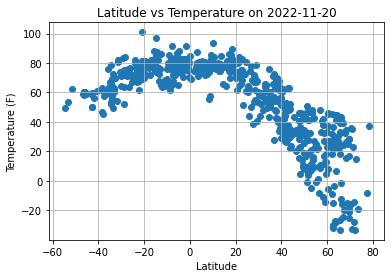

In [70]:
#format the max date in the dataset as "runDate" for graph titles
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../output_data/Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

#### Latitude Vs. Humidity

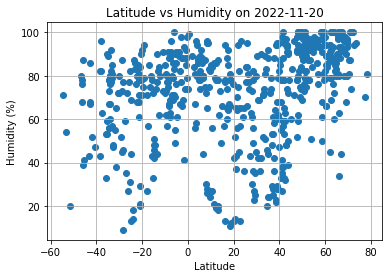

In [71]:
#set data to plot; retain Latitude from previous plot as "x"
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity on {runDate}.png')
plt.show()

#### Latitude Vs. Cloudiness

<function matplotlib.pyplot.show(close=None, block=None)>

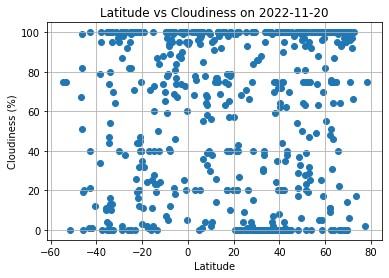

In [72]:
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show

#### Latitude vs. Wind Speed Plot

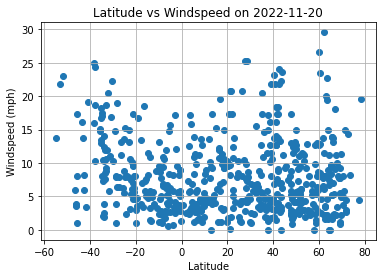

In [73]:
ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
# Display sample data
Northern_DF.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
1,barrow,US,23.02,74,100,14.97,71.2906,-156.7887,1668978766
2,aranda de duero,ES,48.79,88,100,7.54,41.6704,-3.6892,1668978767
3,requena,ES,53.53,79,72,10.65,39.4883,-1.1004,1668978767
7,nanortalik,GL,27.36,85,100,12.64,60.1432,-45.2371,1668978768
8,erenhot,CN,22.39,39,0,7.02,43.6475,111.9767,1668978769


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]
# Display sample data
Southern_DF.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,saldanha,ZA,61.05,85,95,18.61,-33.0117,17.9442,1668978766
4,ancud,CL,56.53,52,1,3.38,-41.8697,-73.8203,1668978768
5,east london,ZA,62.98,79,13,8.79,-33.0153,27.9116,1668978768
6,comodoro rivadavia,AR,60.66,39,0,17.27,-45.8667,-67.5000,1668978708
9,chuy,UY,72.37,77,100,12.46,-33.6971,-53.4616,1668978769


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8461537236661636
y = -1.23x + 92.98


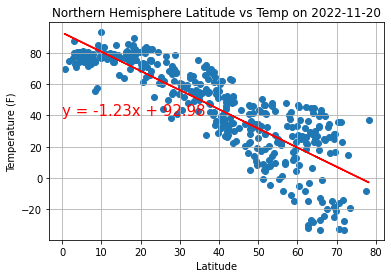

In [77]:
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

The r-square is 0.6682452338389893
y = 0.49x + 82.05


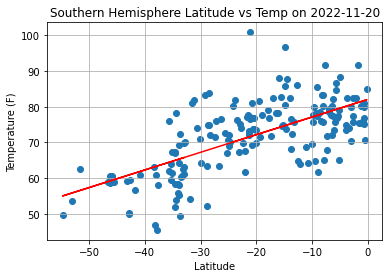

In [78]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** 
The scatter plot maps Northern and Southern cities' temperature against their latitude. Cities selected randomly.

The result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.3430479866687069
y = 0.39x + 57.94


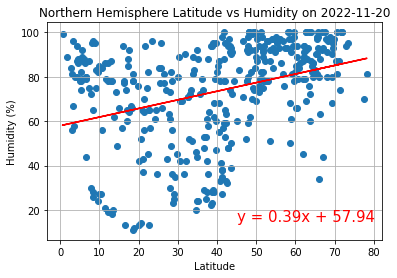

In [79]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

The r-square is 0.27166482403965175
y = 0.39x + 77.09


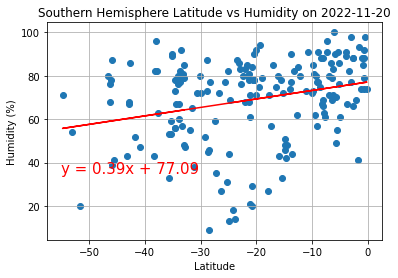

In [80]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The scatter plot maps Northern and Southern cities' humidity against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.0940554724741636
y = 0.19x + 54.87


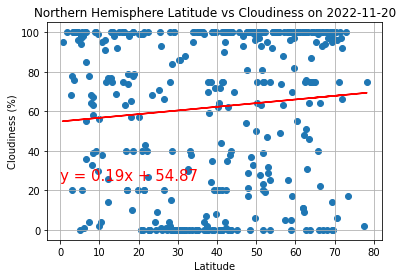

In [81]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

The r-square is 0.24686214353049873
y = 0.69x + 72.15


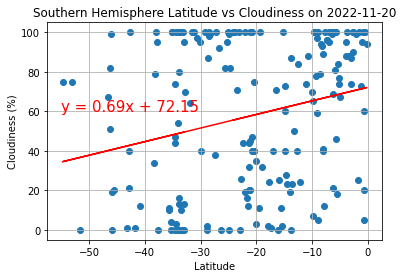

In [82]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The scatter plot maps Northern and Southern cities' cloudiness against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.04470899829322458
y = 0.01x + 7.27


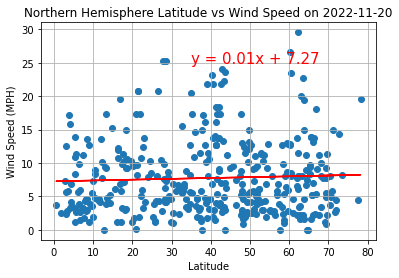

In [83]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

The r-square is -0.4340675148792231
y = -0.17x + 4.73


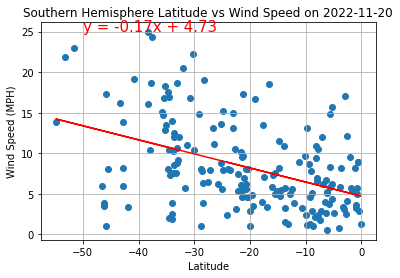

In [84]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The scatter plot maps Northern and Southern cities' wind speed against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and wind speed.